---
title: 'py50 - Showing off Color Features'
subtitle: 'Where I add personality to figures'
author: 'Tony E. Lin'
date: '2024-01-11'
categories: [Python, Streamlit, Coding, Informatics, Plotting]
---

Last post I gave a quick rundown of py50. Here I would like to explain additional features, mainly color and highlighting options. 

When it comes to figures, I think they are one of the more difficult aspects of writing a paper. A good figure must be many things. It must not only convey to the audience what was done, but also the outcome and our own interpretation said results. The figures are also a chance to add a bit of pizazz to the manuscript or presentation. There is nothing wrong with the classic black and white figures, but they can come across as stilted and boring, especially now in 2024 were many manuscripts are downloaded and read as PDFs. Adding additional flourishes to highlight our points with a dash of color will allow our personality, and by extension the research we are trying to convey, to shine. 

py50 offers some of these functions that will, hopefully, allow the figures and results to pop. While py50 offers three different plotting styles, the colors and highlighting options stay the same across the functions. I will show a few examples across all three plot styles. 

For those who want to get their hands dirty immediately, the functions are explained in more detail at the [documentation page](https://py50.readthedocs.io/en/latest/plotcurve.html#plotcurve.PlotCurve.single_curve_plot)

## Example with Single Plot

In addition to the typical configurations for a plot shown here - Plot Title and axis labels - the curve color can be adjusted. This takes the standard name of the color names (red, green, blue, etc) or hex codes. Further, users can highlight IC50 values on the curve using the 'box=True' argument. By default, the box will be gray. Again, the box color can be adjusted using the color names or hex codes.  Importantly, the box does not need to correspond with the IC50. If you wanted to highlight a different area, say IC60, the box can be adjusted accordingly using the 'box_intercept' argument.

All information associated with the plots can be generated using the verbose=True argument. This will print out information related to the plot, consisting of what drug concentration py50 assumes the data is in, what concentration the X-axis will be in (default is in nM), and the concentration and response for the box. 

Drug 1 concentration will be in nM!
Concentration on X-axis will be in nM
Box X intersection:  880.204 nM
Box Y intersection:  60 %


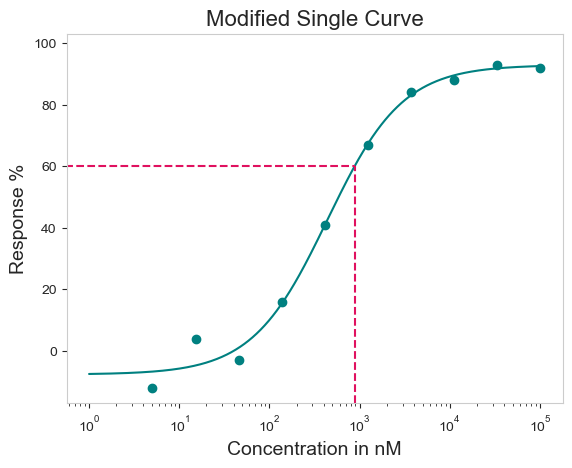

In [2]:
df = pd.read_csv('datasets/py50/single_example.csv')
data = PlotCurve(df)

figure = data.single_curve_plot(drug_name='Drug 1',
                                concentration_col='Compound Conc',
                                response_col='% Inhibition Avg',
                                plot_title='Modified Single Curve',
                                xlabel='Concentration in nM',
                                ylabel='Response %',
                                line_color='teal',
                                box=True,
                                box_color='#E0115F',
                                box_intercept=60,
                                verbose=True)

For those who do not like the box but still want to highlight a particular value on the curve, there are 'vline' or 'hline' arguments. This will draw a dash line across the length of the plot. It is valid for both vertical and horizontal directions. 

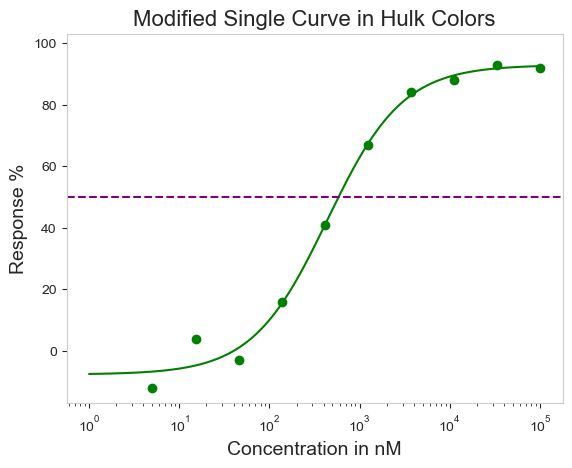

In [3]:
figure = data.single_curve_plot(drug_name='Drug 1',
                                concentration_col='Compound Conc',
                                response_col='% Inhibition Avg',
                                plot_title='Modified Single Curve in Hulk Colors',
                                xlabel='Concentration in nM',
                                ylabel='Response %',
                                line_color='green',
                                hline=50,
                                hline_color='purple')

## Example with Multiple Curves

Depending on the situation, it may be more prudent to show multiple curves in a single plot. That can be done using the multi_curve_plot() function. Again, the options shown here are available in all three plots. By default, the multi_curve_plot() uses a colorblind color and marker palette, but custom colors and markers can be passed as a list. 


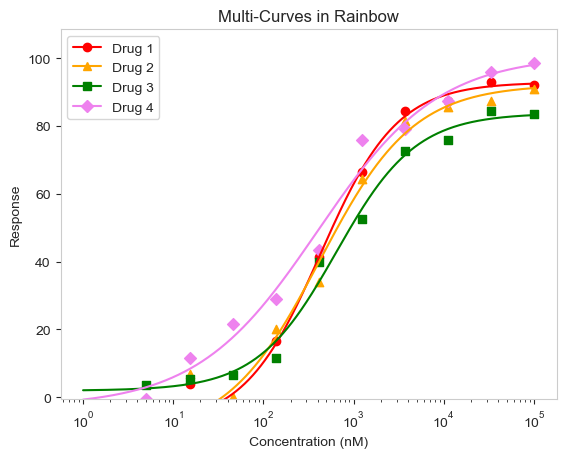

In [4]:
df = pd.read_csv('datasets/py50/multiple_example.csv')
data = PlotCurve(df)

rainbow = ['#ff0000', '#ffa500', '#008000', '#ee82ee']

figure = data.multi_curve_plot(name_col='Compound Name',
                               concentration_col='Compound Conc',
                               response_col='% Inhibition Avg',
                               plot_title='Multi-Curves in Rainbow',
                               xlabel='Concentration (nM)',
                               ylabel='Response',
                               legend=True,
                               line_color=rainbow)

Notice that some points above are below the 0% response. Depending on your dataset, these may be outliers. These can be shown by adjusting the Y axis using either the  ymax or ymin arguments.

With multiple lines in the plot, it may be more prudent to highlight the response. The box can be drawn, but can only be drawn for a specific drug. In this case, the vline or hline arguments would serve better. Here a specific concentration is highlighted instead. The units for the vline must correspond to the plot units. In this case, the vline will be in nanomolar (nM) concentration. Colors can also be specified using the vline_color or hline_color, repsectively. 

This example uses the vline at 880.2 nM, which roughly translates to the IC50 value for Drug 3. 

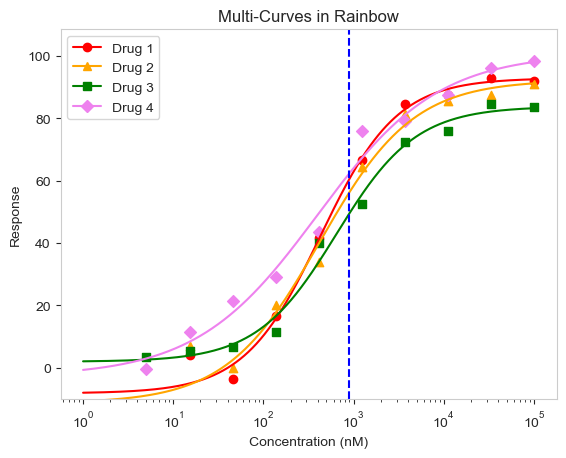

In [5]:
figure = data.multi_curve_plot(name_col='Compound Name',
                               concentration_col='Compound Conc',
                               response_col='% Inhibition Avg',
                               plot_title='Multi-Curves in Rainbow',
                               xlabel='Concentration (nM)',
                               ylabel='Response',
                               legend=True,
                               line_color=rainbow,
                               ymin=-10,
                               vline=880.2,
                               vline_color='blue')

## Example with Grid Plots

Finally, multiple curves can be plotted and arrayed in a grid. Importantly, the grid_curve_plot() function contains an additional argument - column_num. This argument will format the curves accordingly. **Note** the number of curves must be even if you want to array the curves in a grid format. For now, the example will utilize four graphs.

By default, the grid curves are arrayed in a color-blind palette. They can be changed by inputting a color in a list format.   

We can reposition how the plots are laid out using the "column_num=" argument. Note that if this argument is called, the figures will be "distroted". The subplots can be adjusted by including the "figsize=" argument and adjusting the size accordingly.

By default, the grid_curve_plot() was figure size is adjusted for two cures. As a result, the figsize is adjusted manually in these examples. 

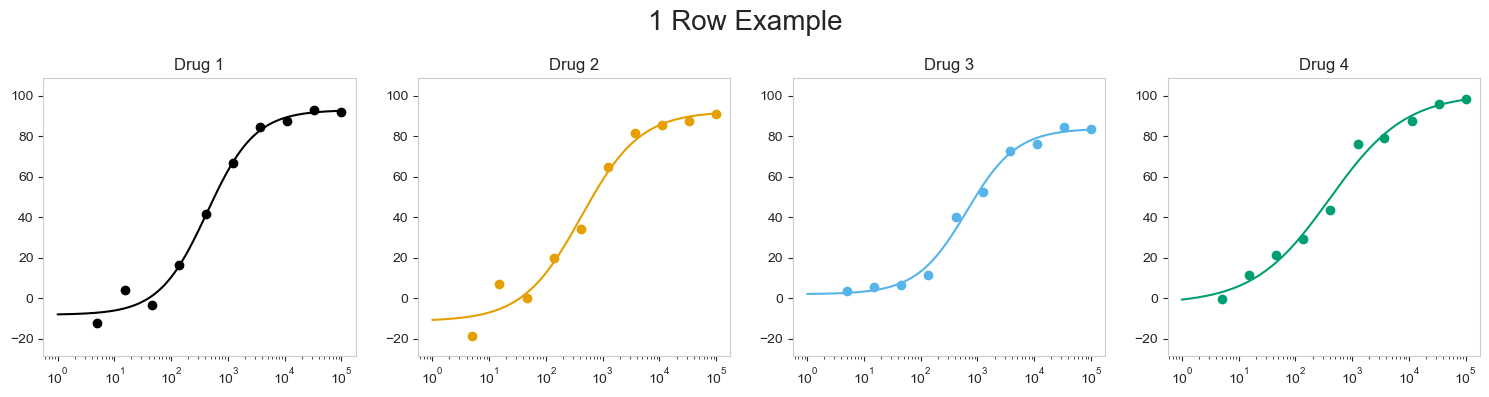

In [6]:
figure = data.grid_curve_plot(name_col='Compound Name',
                              concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='1 Row Example',
                              column_num=4,
                              figsize=(15,4))

Finally, A specific point on the curve can be highlighted using the box or the hline/vline arguments. The box will be plotted for each curve. The figures can be further modified to add a title, adjust the line colors similarly to the examples seen above. 

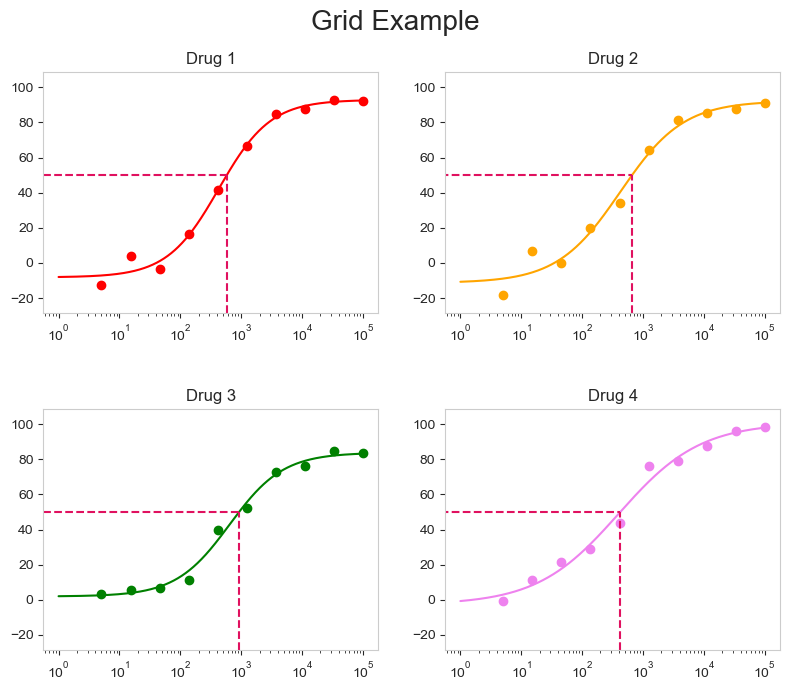

In [7]:
figure = data.grid_curve_plot(name_col='Compound Name',
                              concentration_col='Compound Conc',
                              response_col='% Inhibition Avg',
                              plot_title='Grid Example',
                              line_color=rainbow,
                              box=True,
                              box_color='#E0115F',
                              figsize=(8,7))

## Conclusion

These are some of the features with the plots generated from py50. 

This is a great project for me personally and I learned a lot of making py50. I plan to maintain py50 for the foreseeable future. There are a couple of feature ideas swimming in my head that I would love to include in future releases.

Finally, for anyone who is not as well versed in code, there is a web application version of py50 ([click here](https://py50-app.streamlit.app)). The updates for the program takes a little more time, as I tend to tinker a bit more with UI stuff. But overall, it works fairly well and will get you the calculations and plots needed. 

If you find any issues with py50, feel free to leave a comment on the GitHub repository. 